In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd

iris = load_iris()
y = iris.target
X = iris.data

X.shape

(150, 4)

In [2]:
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
pca = PCA(n_components = 2)
pca = pca.fit(X)

X_dr = pca.transform(X)#new matrix
X_dr.shape

(150, 2)

In [4]:
X_dr

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

**可視化**

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# y==0 -> setosa, 分別代表降維後的第一種feature和第二種feature
X_dr[y == 0, 0], X_dr[y == 0, 1]

(array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
        -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
        -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
        -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
        -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
        -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
        -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
        -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
        -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
        -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978]),
 array([ 0.31939725, -0.17700123, -0.14494943, -0.31829898,  0.32675451,
         0.74133045, -0.08946138,  0.16338496, -0.57831175, -0.11377425,
         0.6450689 ,  0.01472994, -0.235112  , -0.51139459,  1.17876464,
         1.33806233,  0.81067951,  0.31184914,  0

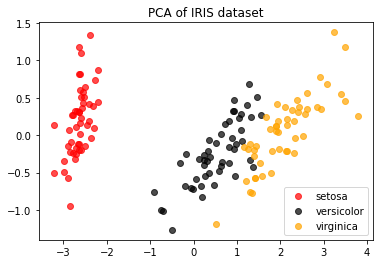

In [7]:
colors = ['red', 'black', 'orange']
plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X_dr[y == i, 0]
    ,X_dr[y == i, 1]
    ,alpha=.7#透明度
    ,c=colors[i]
    ,label=iris.target_names[i]
    )
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

# 降維後的數據

In [8]:
#查看降维後每個新特征向量上所帶的訊息量大小（可解釋性方差的大小）
pca.explained_variance_

array([4.22824171, 0.24267075])

In [9]:
#屬性explained_variance_ratio，查看降維後每個新特徵向量所佔的信息量佔原始數據總信息量的百分比
#又叫做可解釋方差貢獻率
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [10]:
#保留了多少訊息量
pca.explained_variance_ratio_.sum()

0.977685206318795

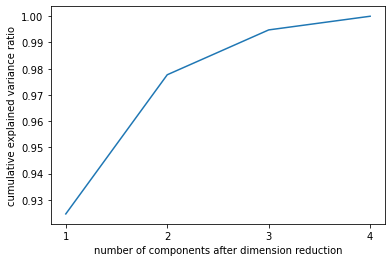

In [11]:
#累積可解釋方差貢獻率曲線

import numpy as np
pca_line = PCA().fit(X)
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4])
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [12]:
# 使用MLE演算法根據特徵的方差分佈情況自己去選擇一定數量的主成分特徵來降維
pca_mle = PCA(n_components="mle")
X_mle = pca_mle.fit_transform(X)
X_mle.shape
#可以發現，mle為我們自動選擇了3個特徵

(150, 3)

In [13]:
pca_mle.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [14]:
pca_mle.explained_variance_ratio_.sum()

0.9947878161267247

In [15]:
#按信息量佔比選超參數
pca_f = PCA(n_components=0.97
            ,svd_solver="full"
           )
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)
pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])

# 用人臉識別看PCA降維後的信息保存量

In [16]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [17]:
faces = fetch_lfw_people(min_faces_per_person=60)
#此範例中共有1348張影像，每張影像大小為62 x 47像素
faces.images.shape

(1348, 62, 47)

In [18]:
faces.data.shape

(1348, 2914)

In [19]:
#用PCA降至150維
X = faces.data
pca = PCA(150)
X_dr = pca.fit_transform(X)
X_dr.shape

(1348, 150)

In [20]:
#從降維過的資料中還原
X_inverse = pca.inverse_transform(X_dr)
X_inverse.shape

(1348, 2914)

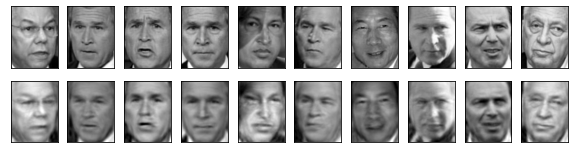

In [21]:
#第一行為原始圖片
#第二行為還原圖片
fig, ax = plt.subplots(2,10,figsize=(10,2.5)
                        ,subplot_kw={"xticks":[],"yticks":[]})

for i in range(10):
    ax[0,i].imshow(faces.images[i,:,:],cmap="binary_r")
    ax[1,i].imshow(X_inverse[i].reshape(62,47),cmap="binary_r")

# 用PCA做噪音過濾

In [22]:
#用Mnist做範例
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
mnist = fetch_openml('mnist_784')
mnist.data.shape

(70000, 784)

In [23]:
set(mnist.target.tolist())

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [24]:
mnist.target.shape

(70000,)

In [25]:
set(mnist.data.ravel().tolist())

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0

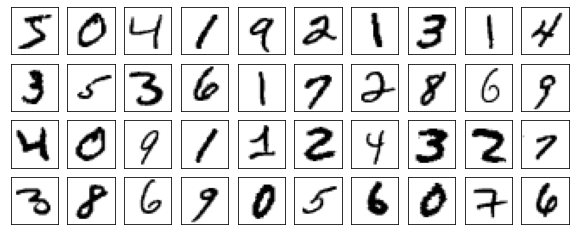

In [26]:
def plot_Mnist(data):
    fig, axes = plt.subplots(4,10,figsize=(10,4)
                            ,subplot_kw = {"xticks":[],"yticks":[]}
                            )
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28,28),cmap="binary")
        
plot_Mnist(mnist.data)

In [27]:
np.random.normal(mnist.data,50).shape

(70000, 784)

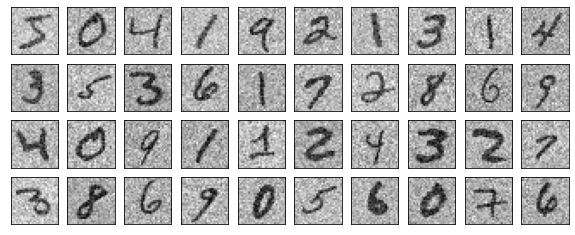

In [28]:
rng = np.random.RandomState(42)
noisy =rng.normal(mnist.data,50)
plot_Mnist(noisy)

In [29]:
X_dr= PCA(0.5).fit_transform(noisy)
#保留一半訊息量後data shape剩下35
X_dr.shape

(70000, 35)

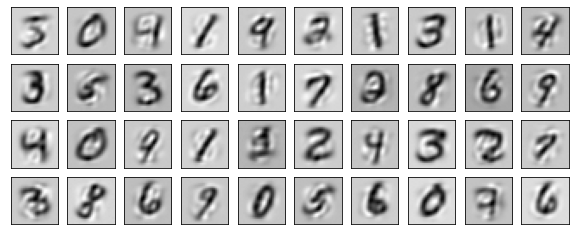

In [30]:
pca = PCA(0.5).fit(noisy)
denoise = pca.inverse_transform(X_dr)
plot_Mnist(denoise)

# 尋找最佳降為後維度的範圍

In [31]:
data_dir = '/Users/bananaiselite/Downloads/'
data = pd.read_csv(data_dir + 'digita_recognizor_train.csv')

In [32]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
X.shape,y.shape

((42000, 784), (42000,))

In [34]:
PCA_line= PCA().fit(X)
PCA_line.explained_variance_ratio_

array([9.74893769e-02, 7.16026628e-02, 6.14590336e-02, 5.37930200e-02,
       4.89426213e-02, 4.30321399e-02, 3.27705076e-02, 2.89210317e-02,
       2.76690235e-02, 2.34887103e-02, 2.09932543e-02, 2.05900116e-02,
       1.70255350e-02, 1.69278702e-02, 1.58112641e-02, 1.48323962e-02,
       1.31968789e-02, 1.28272708e-02, 1.18797614e-02, 1.15275473e-02,
       1.07219122e-02, 1.01519930e-02, 9.64902259e-03, 9.12846068e-03,
       8.87640859e-03, 8.38766308e-03, 8.11855855e-03, 7.77405747e-03,
       7.40635116e-03, 6.86661489e-03, 6.57982211e-03, 6.38798611e-03,
       5.99367016e-03, 5.88913410e-03, 5.64335178e-03, 5.40967048e-03,
       5.09221943e-03, 4.87504936e-03, 4.75569422e-03, 4.66544724e-03,
       4.52952464e-03, 4.44989164e-03, 4.18255277e-03, 3.97505755e-03,
       3.84541993e-03, 3.74919479e-03, 3.61013219e-03, 3.48522166e-03,
       3.36487802e-03, 3.20738135e-03, 3.15467117e-03, 3.09145543e-03,
       2.93709181e-03, 2.86541339e-03, 2.80759437e-03, 2.69618435e-03,
      

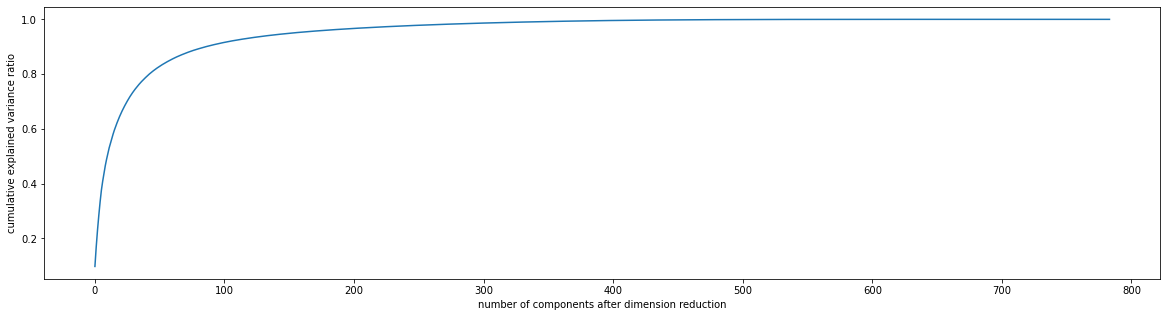

In [35]:
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(PCA_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

**使用隨機森林來進行擬合**

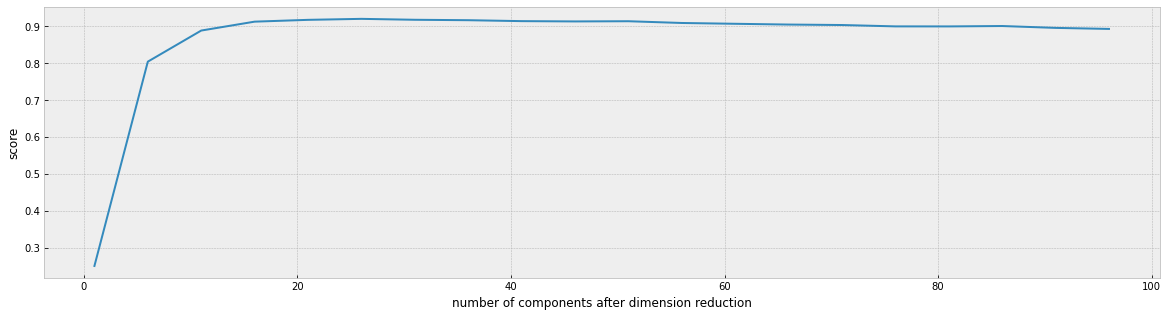

In [36]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
score =[]
for i in range(1, 101, 5):
    X_dr = PCA(i).fit_transform(X)
    temp = cross_val_score(RFC(n_estimators=10,random_state=0)
                           ,X_dr,y,cv=5).mean()
    score.append(temp)
plt.figure(figsize = [20,5])
plt.style.use('bmh')
plt.xlabel("number of components after dimension reduction")
plt.ylabel("score")
plt.plot(range(1,101,5),score)
plt.show()   

**範圍縮小觀察**

/Users/bananaiselite/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bananaiselite/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bananaiselite/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "/Users/bananaiselite/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/bananaiselite/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/bananaiselite/opt/anaconda3/lib/python3.8/sit

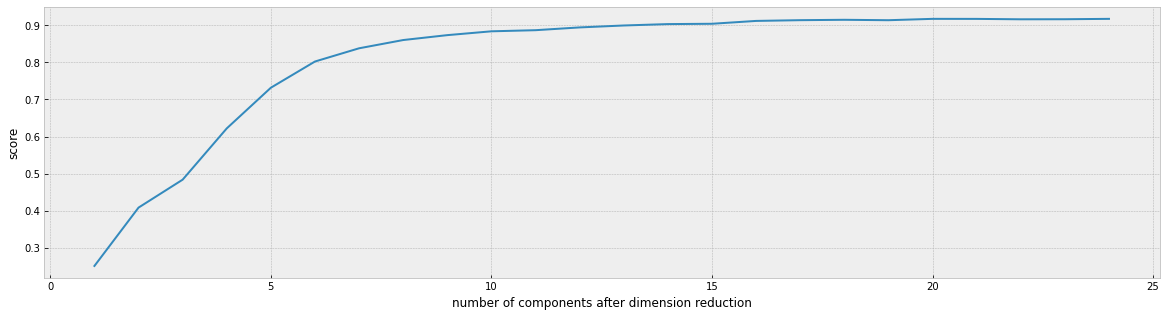

In [57]:
from sklearn.exceptions import FitFailedWarning


score = []
for i in range(10,25):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()

**使用KNN來驗證**

In [45]:
from sklearn.neighbors import KNeighborsClassifier as KNN
X_dr = PCA(15).fit_transform(X)
cross_val_score(KNN(),X_dr,y,cv=5).mean()

0.9562380952380952

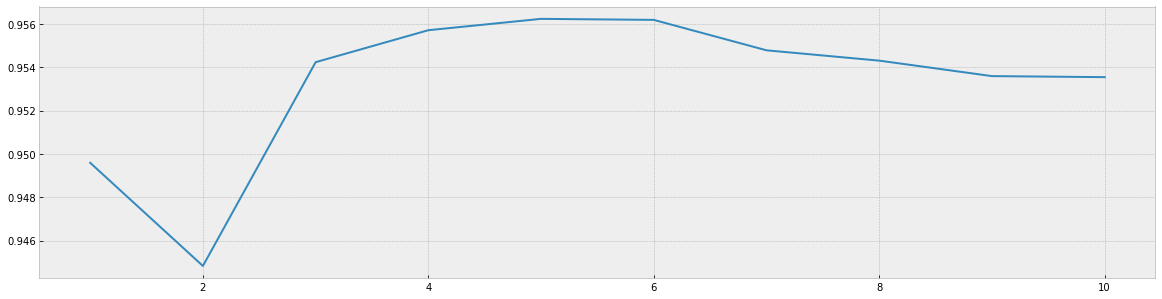

In [46]:
score = []
for i in range(1,11):
    once = cross_val_score(KNN(i),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1, 11),score)
plt.show()

In [40]:
score.index(max(score))

5

In [54]:
cross_val_score(KNN(5),X_dr,y,cv=5).mean()

0.9562380952380952